In [ ]:
!pip install matplotlib scikit-learn

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [3]:
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), early_stopping=True).fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

Fitting the classifier to the training set
                   precision    recall  f1-score   support

     Colin Powell       0.84      0.73      0.78        70
  Donald Rumsfeld       0.59      0.43      0.50        30
    George W Bush       0.83      0.94      0.88       163
Gerhard Schroeder       0.58      0.69      0.63        26
       Tony Blair       0.77      0.64      0.70        53

         accuracy                           0.79       342
        macro avg       0.72      0.69      0.70       342
     weighted avg       0.78      0.79      0.78       342



In [4]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())


def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield f'predicted: {pred_name}\n true: {true_name}'

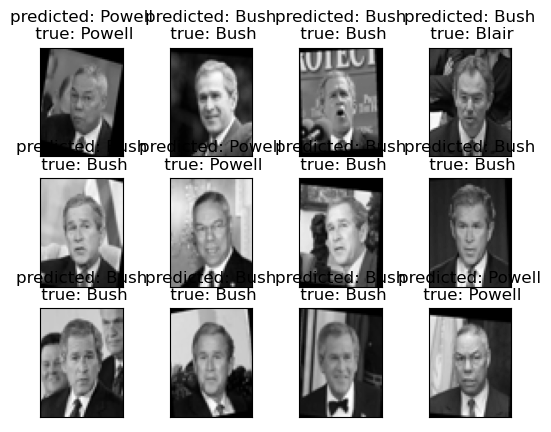

In [5]:
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)
plt.show()